In [ ]:
import pandas as pd
import re
from google.colab import files
uploaded = files.upload()
from tabulate import tabulate


Saving Data ETL Final_state and rating_Rev02.xlsx to Data ETL Final_state and rating_Rev02.xlsx


**Final State****Top 10 Job demand in State and Job Salary **


Summary of Job Counts by Category



,Total Jobs
Job Category,
Data Scientist,197
Data Engineer,89
Data Analyst,85
Business Analyst,20
Machine Learning Engineer,15
Total,406


Summary of The Top 10 States by Job Demand:


Job Category,Business Analyst,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer
Desc,,,,,
California,4,16,17,49,3
Illinois,1,3,6,10,1
Maryland,0,3,4,9,0
Massachusetts,7,6,8,20,2
New Jersey,0,6,2,4,0
New York,0,10,4,26,3
Pennsylvania,1,6,2,5,2
Texas,0,0,7,7,1
Virginia,0,5,8,16,1


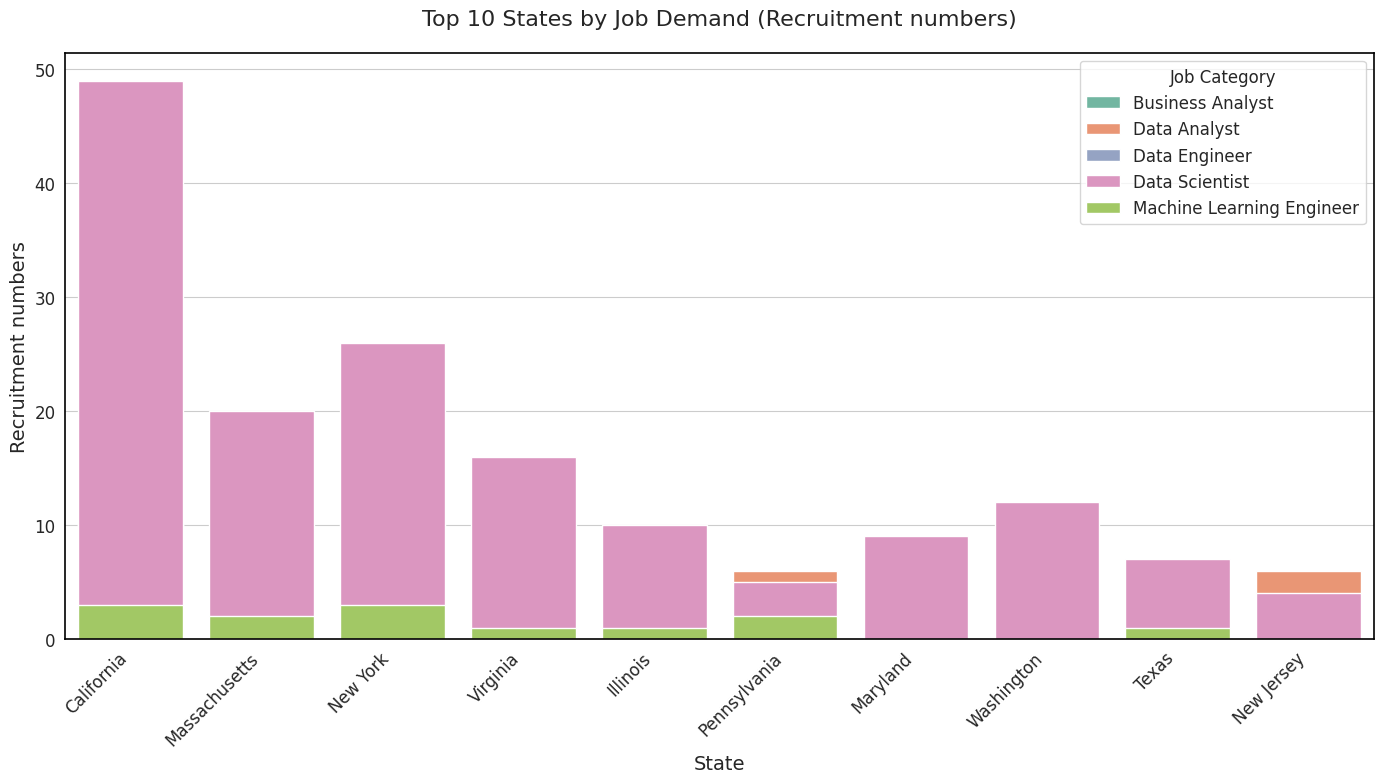

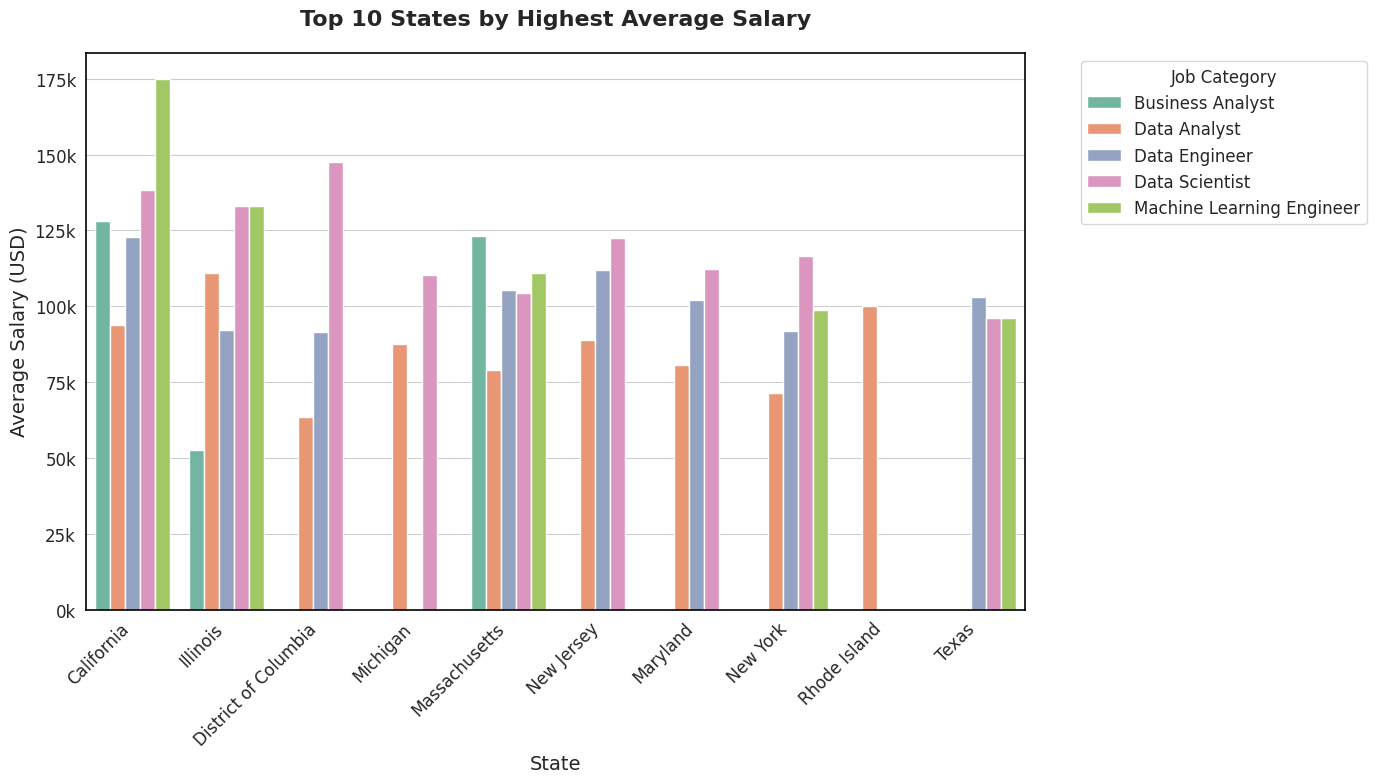

In [ ]:
# =========================
# 📌 Import Libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')


# =========================
# 📌 Load File
# =========================
file_path = "/content/Data ETL Final_state and rating_Rev02.xlsx"
df = pd.read_excel(file_path)

# ทำความสะอาดชื่อ column
df.columns = df.columns.str.strip()

# นับจำนวนงานในแต่ละ Job Category และแสดงผลในรูปแบบตาราง Pivot
print("\nSummary of Job Counts by Category\n")
Job_counts = df['Job Category'].value_counts()
Job_counts_df = pd.DataFrame(Job_counts)
Job_counts_df.index.name = "Job Category"
Job_counts_df.columns = ["Total Jobs"]


total_jobs = Job_counts_df['Total Jobs'].sum()

Job_counts_df.loc["Total"] = total_jobs

display(Job_counts_df)

# นับจำนวนงานในแต่ละรัฐและเลือก 10 อันดับแรก
state_counts = df['Desc'].value_counts()
top_10_states = state_counts.head(10).index.tolist()

# กรองข้อมูลเฉพาะ 10 รัฐแรก
df_top_10 = df[df['Desc'].isin(top_10_states)]

# สร้าง Pivot Table
pivot_table = pd.pivot_table(df_top_10,
                             index='Desc',
                             columns='Job Category',
                             aggfunc='size',
                             fill_value=0)

# เพิ่มแถว "Total" ที่สรุปผลรวมของแต่ละ Job Category
pivot_table.loc['Total'] = pivot_table.sum()

# แสดงผลลัพธ์ในรูปแบบตารางใช้ pandas
print("Summary of The Top 10 States by Job Demand:")
display(pivot_table)

# =========================
# 📌 Set Graph Styles
# =========================
warnings.filterwarnings('ignore')
plt.style.use('default')      # พื้นหลังสีขาว
sns.set_style("whitegrid")    # เส้น grid
palette = sns.color_palette("Set2")

plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.figsize'] = (14, 8)

# กำหนดลำดับของ Job Category เพื่อให้สีเหมือนกันในทุกกราฟ
hue_order = sorted(df['Job Category'].unique())


# =========================
# 📊 Graph 1: Top 10 States by Job Demand
# =========================
job_demand = df.groupby(["Desc", "Job Category"])["Job Title"].count().reset_index()
job_demand = job_demand.rename(columns={"Job Title": "Job Count"})

# Top 10 states
state_job_total = job_demand.groupby("Desc")["Job Count"].sum().reset_index()
top10_states_demand = state_job_total.sort_values(
    by="Job Count", ascending=False
).head(10)

# Filter
job_demand_top10 = job_demand[job_demand["Desc"].isin(top10_states_demand["Desc"])].copy()
job_demand_top10['Desc'] = pd.Categorical(
    job_demand_top10['Desc'],
    categories=top10_states_demand['Desc'],
    ordered=True
)

plt.figure(figsize=(14, 8))
ax1 = sns.barplot(
    data=job_demand_top10,
    x="Desc", y="Job Count",
    hue="Job Category",
    hue_order=hue_order,
    palette=palette,
    dodge=False, edgecolor=None
)

ax1.set_title("Top 10 States by Job Demand (Recruitment numbers)", pad=20)
ax1.set_xlabel("State")
ax1.set_ylabel("Recruitment numbers")
plt.xticks(rotation=45, ha='right')

# Legend ข้างในกราฟ
ax1.legend(title="Job Category", loc="upper right", frameon=True)

# เพิ่มกรอบรอบกราฟ
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color("black")

plt.tight_layout()
plt.show()


# =========================
# 📊 Graph 2: Top 10 States by Highest Average Salary
# =========================

# --- Data Preparation for Graph ---

# 1. คำนวณเงินเดือนเฉลี่ยของแต่ละรัฐ
state_salary_mean = df.groupby("Desc")["Salary Mid Point"].mean().reset_index()

# 2. เลือก Top 10 รัฐที่มีรายได้เฉลี่ยสูงสุด
top10_states = state_salary_mean.sort_values(by="Salary Mid Point", ascending=False).head(10)

# 3. กรองข้อมูลจาก DataFrame หลัก เพื่อให้มีเฉพาะ 10 รัฐที่เลือก
df_top10 = df[df["Desc"].isin(top10_states["Desc"])].copy()

# 4. คำนวณรายได้เฉลี่ยตาม Job Category ใน 10 รัฐนี้
avg_salary_top10 = df_top10.groupby(["Desc", "Job Category"])["Salary Mid Point"].mean().reset_index()

# 5. จัดเรียงลำดับรัฐในข้อมูลกราฟให้ตรงกับ Top 10
avg_salary_top10['Desc'] = pd.Categorical(
    avg_salary_top10['Desc'],
    categories=top10_states['Desc'],
    ordered=True
)
avg_salary_top10 = avg_salary_top10.sort_values(by='Desc')

# --- Graph (Grouped Bar Chart) ---
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=avg_salary_top10,
    x="Desc",
    y="Salary Mid Point",
    hue="Job Category",
    hue_order=hue_order,
    palette=palette
)

# ตกแต่งกราฟ
ax.set_title("Top 10 States by Highest Average Salary", pad=20, weight="bold")
ax.set_xlabel("State", fontsize=14)
ax.set_ylabel("Average Salary (USD)", fontsize=14)
plt.xticks(rotation=45, ha='right')

# Format แกน Y เป็นหน่วย K
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

# เพิ่ม Legend
plt.legend(title="Job Category", bbox_to_anchor=(1.05, 1), loc='upper left')

# เพิ่มกรอบรอบกราฟ
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color("black")

plt.tight_layout()
plt.show()

**Analysis State :**

ข้อมูลการจ้างงานของประเทศสหรัฐอเมริกา ในปี 2024 จาก Website : Glassdoor เว็บไซต์สำหรับค้นหางาน รีวิวบริษัท และข้อมูลเงินเดือนจากพนักงานจริง
นำมาวิเคราะห์จำนวนความต้องการจ้างงานในสายงาน Data ได้แก่ Data Scientist, Data Engineer, Data Analyst, Business Analyst, Machine Learning Engineer
พบว่าจำนวนการจ้างงานทั้งหมด 406 งาน มีสัดส่วนการจ้างงาน Data Scientist สูงที่สุด ที่ 49% อันดับที่ 2 Data Engineer ที่ 22%,  Data Analyst 21% ,Business Analyst 5% และ Machine Learning Engineer 4%

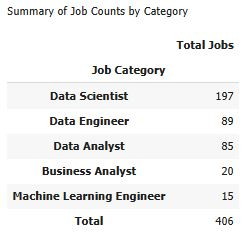

นำข้อมูลเพื่อวิเคราะห์ต้องการการจ้างงานในสาย Data ในรัฐใดมีความต้องการมากที่สุด 10 อันดับแรก
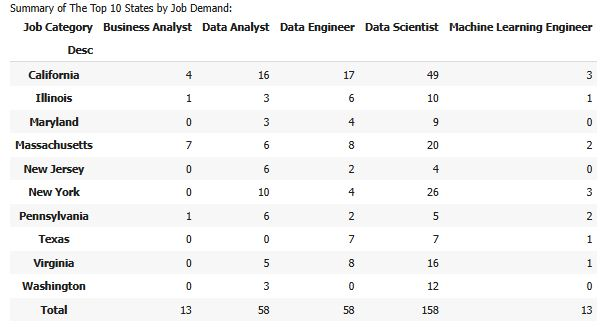

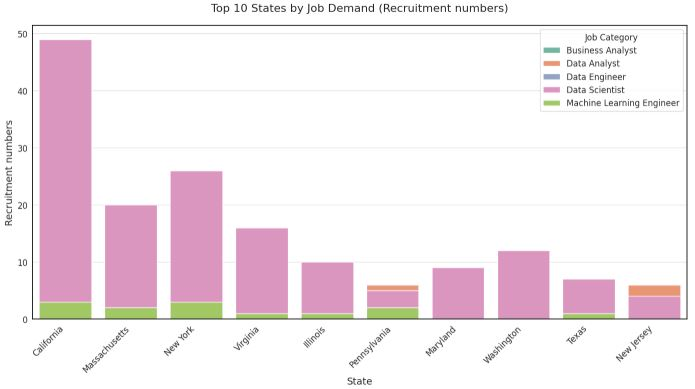

1. จากกราฟที่ ….. พบว่ารัฐ California มีการจ้างงานมากที่สุด ตามมาด้วย New York ทั้งสองรัฐสายงานที่จ้างมากที่สุด คือ Data Scientist เนื่องจากว่า California คือ ศูนย์กลางเทคโนโลยีของโลก (Silicon Valley) ที่ตั้งอยู่ในบริเวณอ่าวซานฟรานซิสโก (San Francisco Bay Area) เป็นแหล่งรวมบริษัทเทคโนโลยี ซอฟต์แวร์ อินเทอร์เน็ต และสตาร์ทอัพมากมาย เช่น Apple, Google, Meta (Facebook), Intel และ Tesla ส่วน New York มีอุตสาหกรรมการเงินและธุรกิจ จึงมีความต้องการจ้างงานในสาย Data ด้วยเช่นกัน
2. วิเคราะห์ต่อในแต่ละรัฐTop 10 ที่มีการจ่ายเงินเดือนค่าเฉลี่ยในรัฐใดมากที่สุด
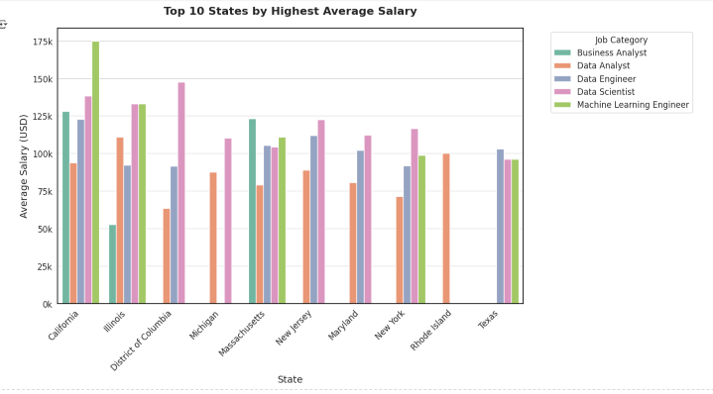

จากกราฟที่ …. พบว่า Top 10 รัฐที่มีการจ่ายเงินเดือนให้สูงที่สุด ได้แก่ California, New York และ Illinois เป็นต้น ซึ่งจะเห็นได้ว่า เมื่อความต้องการจ้างงานสูง การจ่ายเงินเดือนก็สูงตาม นอกจากนี้ใน California เงินเดือนในงาน Machine Learning Engineer มีการจ่ายเงินเดือนที่สูงกว่า Data Scientist แสดงให้เห็นว่าสายงาน Machine Learning Engineer เป็นสายงานที่ให้เงินเดือนสูงใน California แม้การจ้างงาน Machine Learning Engineer ใน US มีเพียง 5% แต่กลับให้ค่าตอบแทนที่สูง


**Rating company VS Salary**

------------------------------------------------
จำนวนงานตาม Job Level และ Rating Group
------------------------------------------------


Rating Group,1-2.9,3-3.9,4-5
Job Level,,,
Entry Level,0,9,1
Executive,0,8,1
Management,0,11,2
Mid Level,16,153,108
Senior Level,10,56,27
Sum Total,26,237,139


------------------------------------------------
Mid Level: Count + Average Salary by Rating Group
------------------------------------------------


------------------------------------------------



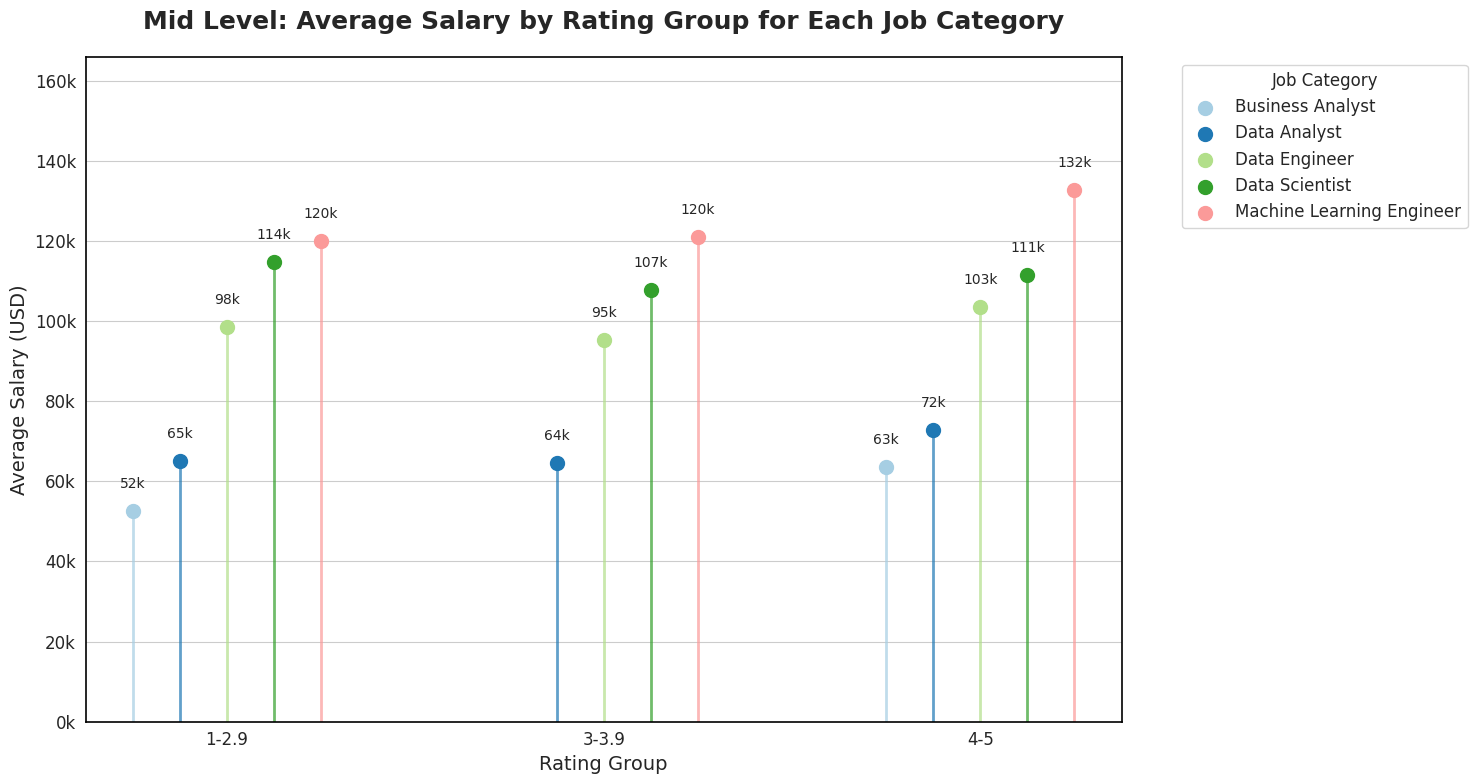

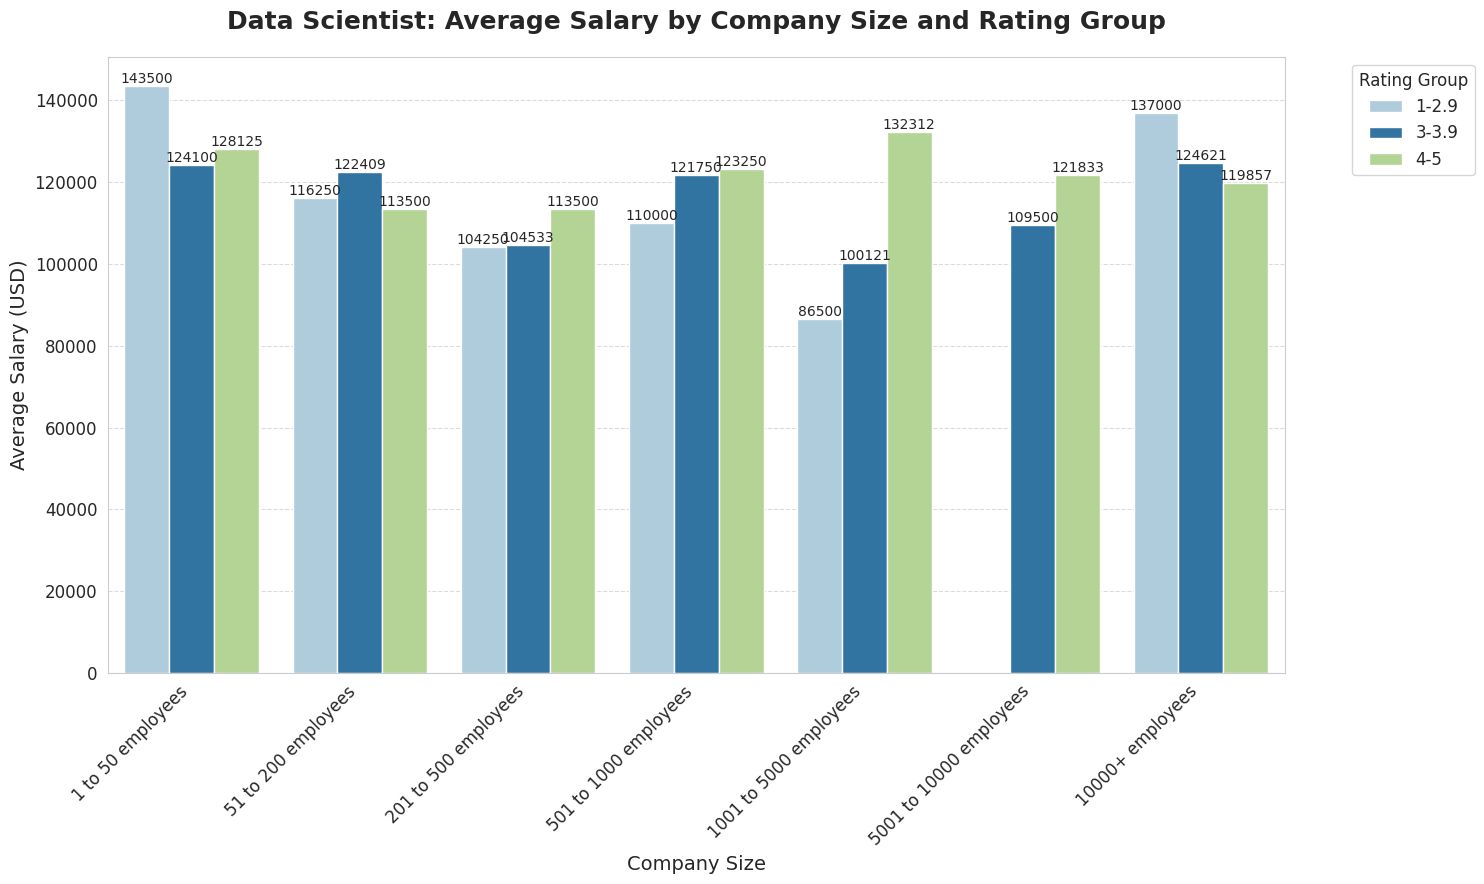

In [ ]:
# =========================
# 📌 Import Libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')

# ตั้งค่าสไตล์ของกราฟ
plt.style.use('default')  # พื้นหลังสีขาว
sns.set_style("whitegrid", {'axes.grid.axis': 'y'})  # เส้น grid แนวนอนเท่านั้น
sns.set_palette("Paired")  # ใช้โทนสีที่สวยงามและหลากหลาย
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.family'] = 'sans-serif' # เพิ่มเพื่อให้ตัวอักษรดูเรียบร้อยขึ้น

# ---


## จัดการข้อมูล

bins = [0, 2.9, 3.9, 5.0]
labels = ['1-2.9', '3-3.9', '4-5']
df['Rating Group'] = pd.cut(df['Rating'], bins=bins, labels=labels, right=True)

# ------------------------------------------------
# 1) Pivot: Count by Job Level + Rating Group
# ------------------------------------------------
# กรองข้อมูลที่ไม่ใช่ Job Level ออกเพื่อให้ตารางสะอาด
job_level_list = ['Entry Level', 'Executive', 'Mid Level', 'Senior Level', 'Management', 'entry Level']
filtered_df = df[df['Job Level'].isin(job_level_list)].copy()

# แก้ไขคำสะกดผิด 'entry Level' ให้เป็น 'Entry Level'
filtered_df['Job Level'] = filtered_df['Job Level'].replace('entry Level', 'Entry Level')

# สร้างคอลัมน์ Rating Group ให้กับ filtered_df ที่ถูกกรองแล้ว
bins_filtered = [0, 2.9, 3.9, 5.0]
labels_filtered = ['1-2.9', '3-3.9', '4-5']
filtered_df['Rating Group'] = pd.cut(filtered_df['Rating'], bins=bins_filtered, labels=labels_filtered, right=True)

# สร้าง Pivot Table
pivot_job_level = pd.pivot_table(
    filtered_df,
    index="Job Level",
    columns="Rating Group",
    values="Job Title",
    aggfunc="count",
    fill_value=0
)

# เพิ่มแถว Sum Total
pivot_job_level.loc["Sum Total"] = pivot_job_level.sum(axis=0)

# แสดงผลตารางที่ 1 ด้วย .style เพื่อให้มีเส้นตาราง
print("------------------------------------------------")
print("จำนวนงานตาม Job Level และ Rating Group")
print("------------------------------------------------")

styled_pivot_job_level = pivot_job_level.style.set_table_styles(
    [
        {"selector": "th, td", "props": [("border", "1px solid black"), ("padding", "8px")]}
    ]
).format(None, precision=0)  # Format as integer

display(styled_pivot_job_level)

# ------------------------------------------------
# 2) Pivot: Mid Level → Count + Avg Salary
# ------------------------------------------------
df_mid = df[df["Job Level"] == "Mid Level"]

pivot_mid_count = pd.pivot_table(
    df_mid,
    index="Job Category",
    columns="Rating Group",
    values="Job Title",
    aggfunc="count",
    fill_value=0
)

pivot_mid_salary = pd.pivot_table(
    df_mid,
    index="Job Category",
    columns="Rating Group",
    values="Salary Mid Point",
    aggfunc="mean",
    fill_value=0
)

# สร้างแถวผลรวมสำหรับทั้งสองตาราง
sum_counts_row = pivot_mid_count.sum(axis=0)
avg_salary_row = pivot_mid_salary.mean(axis=0)

# เพิ่มแถวผลรวมเข้าไปในแต่ละตาราง
pivot_mid_count_with_sum = pd.concat([pivot_mid_count, sum_counts_row.to_frame(name='Sum Total').T])
pivot_mid_salary_with_sum = pd.concat([pivot_mid_salary, avg_salary_row.to_frame(name='Sum Total').T])

# สร้าง DataFrame ที่รวมตารางทั้งสองเข้าด้วยกัน
combined_df = pd.DataFrame(
    np.concatenate([pivot_mid_count_with_sum.values, pivot_mid_salary_with_sum.values], axis=1),
    index=pivot_mid_count_with_sum.index,
    columns=pd.MultiIndex.from_product(
        [['Count', 'Average Salary Each in Rating'], pivot_mid_count_with_sum.columns]
    )
)
combined_df.index.name = "Job Category"

# แสดงผลตารางที่ 2
print("------------------------------------------------")
print("Mid Level: Count + Average Salary by Rating Group")
print("------------------------------------------------")
styled_combined_df = combined_df.style.set_table_styles(
    [
        {"selector": "th, td", "props": [("border", "1px solid black"), ("padding", "4px")]}
    ]
).format(None, precision=2)
display(styled_combined_df)
print("------------------------------------------------\n")


# -------------------------------
# 1) กราฟ Lollipop สำหรับ Mid Level
# -------------------------------
# เตรียมข้อมูลให้อยู่ในรูปแบบที่เหมาะสมกับการพลอต Lollipop Chart
avg_salary_by_group = df_mid.groupby(['Rating Group', 'Job Category'])['Salary Mid Point'].mean().unstack(level=1)
# flatten DataFrame เพื่อพลอตง่ายขึ้น
melted_df = avg_salary_by_group.melt(ignore_index=False).reset_index()

# กำหนดค่า x-axis สำหรับแต่ละกลุ่ม
group_names = melted_df['Rating Group'].unique()
x_positions = {group: i for i, group in enumerate(group_names)}

# กำหนดค่า x-offset สำหรับแต่ละ Job Category เพื่อให้แสดงเป็นกลุ่ม
job_categories = melted_df['Job Category'].unique()
num_categories = len(job_categories)
offsets = np.linspace(-0.25, 0.25, num_categories)
job_offsets = {job: offset for job, offset in zip(job_categories, offsets)}

# พลอตกราฟ
fig, ax = plt.subplots(figsize=(15, 8))

# สร้าง dictionary สำหรับสีของแต่ละ Job Category
colors = sns.color_palette("Paired", num_categories)
color_map = {job: color for job, color in zip(job_categories, colors)}

# วาดเส้นและจุดสำหรับแต่ละ Job Category
for i, job in enumerate(job_categories):
    job_data = melted_df[melted_df['Job Category'] == job]
    x_pos = [x_positions[group] + job_offsets[job] for group in job_data['Rating Group']]
    y_val = job_data['value']

    # วาดเส้น (Line)
    ax.vlines(x=x_pos, ymin=0, ymax=y_val, color=color_map[job], alpha=0.7, linewidth=2)

    # วาดจุด (Dot)
    ax.scatter(x=x_pos, y=y_val, color=color_map[job], s=100, label=job, zorder=2)

    # เพิ่ม label สำหรับแต่ละจุด (ปรับปรุงใหม่)
    for x, y in zip(x_pos, y_val):
        # ตรวจสอบว่าค่า y ไม่ใช่ NaN ก่อนทำการแสดงผล
        if pd.notna(y):
            ax.text(x, y + 5000, f'{int(y/1000)}k', ha='center', va='bottom', fontsize=10)

# ปรับปรุง: Format แกน Y ให้แสดงเป็นหน่วย K และเพิ่มกรอบรอบกราฟ
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))

# ปรับปรุง: ตั้งค่าขอบเขตแกน Y ให้แคบลง
ax.set_ylim(bottom=0, top=max(melted_df['value'].fillna(0)) * 1.25)

# ตกแต่งกราฟ
ax.set_title('Mid Level: Average Salary by Rating Group for Each Job Category', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Rating Group', fontsize=14)
ax.set_ylabel('Average Salary (USD)', fontsize=14)
ax.set_xticks(np.arange(len(group_names)))
ax.set_xticklabels(group_names)

# Box legend
ax.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# ปรับเส้น Grid
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# เพิ่มกรอบรอบกราฟ
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.2)
    spine.set_color("black")

plt.tight_layout()
plt.show()
# =========================
# Graph 2: Heatmap for Data Scientist Salary
# =========================
# 1. กรองข้อมูลเฉพาะงาน Data Scientist
df_ds = df[df['Job Category'] == 'Data Scientist'].copy()

# 2. จัดกลุ่มข้อมูลตาม 'Size' และ 'Rating Group'
bins = [0, 2.9, 3.9, 5.0]
labels = ['1-2.9', '3-3.9', '4-5']
df_ds['Rating Group'] = pd.cut(df_ds['Rating'], bins=bins, labels=labels, right=True)

# 3. จัดกลุ่มข้อมูลเพื่อเตรียมสำหรับกราฟแท่ง
grouped_bar_data = df_ds.groupby(['Size', 'Rating Group']).agg(
    Avg_Salary=('Salary Mid Point', 'mean')
).reset_index()

# 4. กำหนดลำดับของ Company Size ที่ถูกต้อง
size_order = [
    '1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees'
]

# 5. สร้างกราฟแท่งแบบกลุ่ม
plt.figure(figsize=(15, 9))
ax = sns.barplot(
    data=grouped_bar_data,
    x='Size',
    y='Avg_Salary',
    hue='Rating Group',
    order=size_order,
    palette='Paired'
)

# 6. เพิ่มตัวเลขกำกับบนแท่งกราฟ
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10)

# 7. ตกแต่งกราฟ
ax.set_title("Data Scientist: Average Salary by Company Size and Rating Group", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Company Size", fontsize=14)
ax.set_ylabel("Average Salary (USD)", fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# ปรับตัวอักษรบนแกน X
plt.xticks(rotation=45, ha='right')

# จัด Legend Box
ax.legend(title='Rating Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

**Analysis Rating : **

3.วิเคราะห์ข้อมูลในเชิงของ Rating กับรายได้ของแต่ละกลุ่มงาน

โดยใช้ข้อมูลจากคะแนน Rating บน Glassdoor คือ คะแนนที่ให้โดยพนักงานปัจจุบันและอดีตพนักงาน ของบริษัทนั้นๆ โดยเป็นการให้คะแนนแบบไม่ระบุตัวตน (Anonymous) เพื่อให้ผู้รีวิวสามารถแสดงความคิดเห็นได้อย่างอิสระ คะแนนเฉลี่ย: Rating เป็นคะแนนเฉลี่ยรวมที่มาจากรีวิวของพนักงานหลายคน โดยทั่วไปจะอยู่ในช่วง 1-5 ดาว
จาก Rating ทั้งหมดได้นำมาจัด Group 3 ช่วง ได้แก่ ระดับคะแนน 1-2.9 คือ ระดับน้อย 3-3.9 คือระดับปานกลาง ระดับ 4-5. คือระดับดีมาก
จากข้อมูลการจ้างงานในระดับงาน Mid Level มีจำนวนการจ้างงานที่มากที่สุด จึงนำมาวิเคราะห์ดังต่อไปนี้



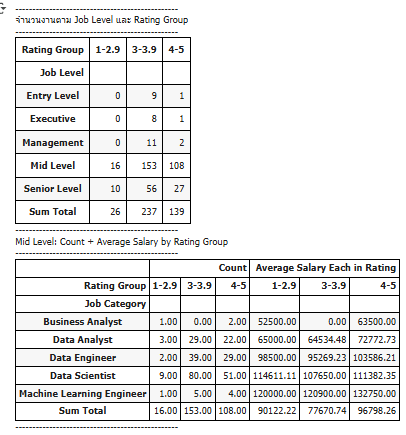

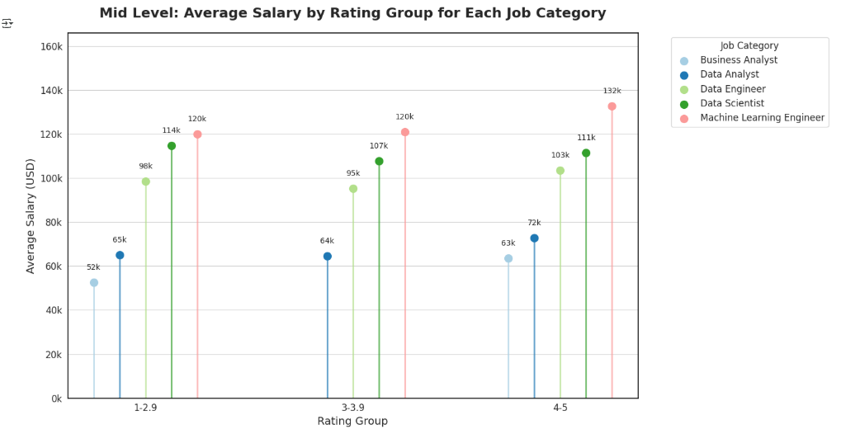

1. เพื่อวิเคราะห์ความสัมพันธ์ของรายได้ในแต่ละกลุ่มงานและ Rating ที่ได้รับการรีวิวจากพนักงานในปัจจุบันและอดีตพนักงานของงานนั้นๆ พบว่า ในระดับตำแหน่ง Mid Level เงินเดือนไม่ได้สัมพันธ์เชิงบวกกับ Rating ในแต่ละระดับทั้ง 3 ช่วง ระดับ Rating มีค่าจ้างในแต่ละประเภทของงานอยู่ในระดับใกล้เคียงกัน แต่จากกราฟงาน Data Scientist ในระดับ Rating น้อย ให้ค่าตอบแทนที่ 114K แต่งาน Data Scientist ในระดับ Rating ดีมาก ให้ค่าตอบแทนที่ 111K ซึ่งน้อยกว่าในกลุ่ม Rating ระดับน้อย
ดังนั้นจากการวิเคราะห์ระดับ Rating ภาพรวมไม่ได้มีผลต่อการให้เงินเดือน เนื่องจากต้องพิจารณาจากปัจจัยอื่นๆ ได้แก่ ด้าน Work-Life Balance , วัฒนธรรมองค์กร, ความมีชื่อเสียงขององค์กร และสวัสดิการ

จึงนำมาวิคราะห์เฉพาะในงาน Data Scientist ในกราฟที่....


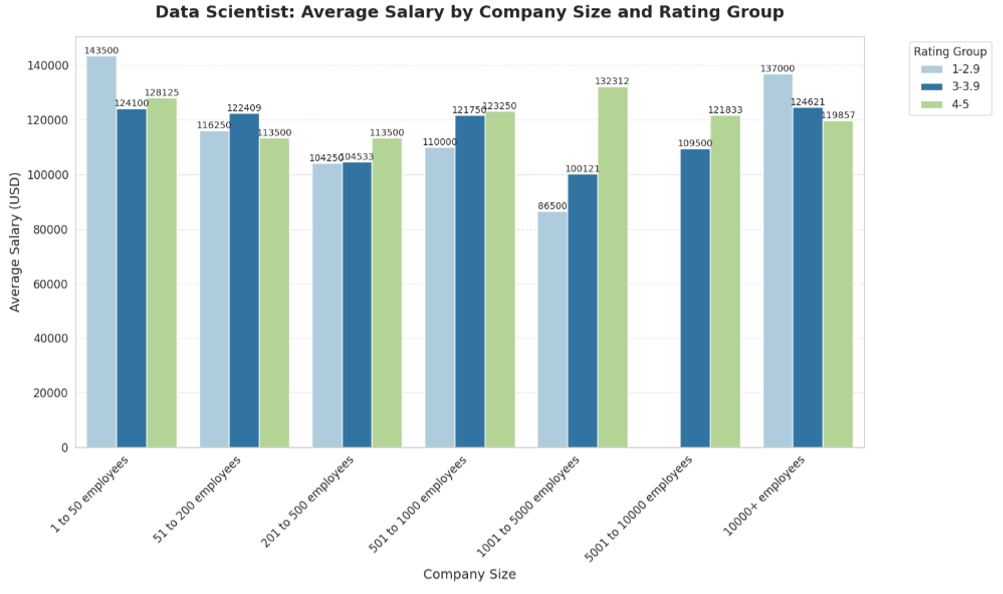


2. หลังจากได้วิเคราะห์ได้เห็นภาพรวมของ Rating ที่มีผลกับเงินเดือนในแต่ละสายงาน Data แล้ว จึงได้นำมาวิเคราะห์ต่อในเฉพาะสายงาน Data Scientist กับขนาดของบริษัท เพื่อให้เป็นข้อมูลประกอบตัดสินใจว่าขนาดของบริษัทมีผลต่อระดับ Rating หรือไม่
โดยข้อมูลขนาดของบริษัทได้แก่ กลุ่มขนาดเล็กไปจนถึงขนาดใหญ่ จัดระดับ Company Size จากจำนวนพนักงานตั้งแต่1-10,000 คนเป็นต้นไป
จากกราฟที่…. แสดงให้เห็นว่า บริษัทระดับกลาง(จำนวนพนักงาน 1001-5000 คน) Rating ระดับดีมาก ให้เงินเดือนสูงสุดที่ 132K และ จำนวนพนักงาน 5001-10,000 คน ไม่มีระดับ Rating น้อย
แต่ในทางกลับกันในกลุ่มระดับ Rating น้อย ให้เงินเดือนที่สูงใน Company Size ขนาดเล็ก ซึ่งเป็นบริษัท Start Up และ Company Size ขนาดใหญ่ (จำนวนพนักงาน 10,000 คนขึ้นไป)

ดังนั้น Company Size บริษัทระดับกลางมี Rating ในระดับดีมาก และเงินเดือนที่สูงเช่นกัน
และกลุ่มระดับ Rating น้อย ให้เงินเดือนที่สูง อยู่ทั้งในระดับ Company Size ขนาดเล็กและขนาดใหญ่ Company Size จึงไม่มีผลต่อ Rating มากนัก ต้องพิจารณาจากปัจจัยอื่นๆจากที่กล่าวมาข้างต้นร่วมด้วยเช่นกัน


# **END**

**ไม่ใช้**

In [ ]:
# =========================
# New Graph: Final Lollipop Chart
# =========================
# 1. กรองข้อมูลเฉพาะงาน Data Scientist
df_ds = df[df['Job Category'] == 'Data Scientist'].copy()

# 2. จัดกลุ่มข้อมูลตาม 'Size' และ 'Rating Group'
#    - ต้องสร้าง Rating Group อีกครั้งเพื่อให้แน่ใจว่ามีข้อมูลที่ถูกต้องสำหรับ DataFrame ที่ถูกกรองแล้ว
bins = [0, 2.9, 3.9, 5.0]
labels = ['1-2.9', '3-3.9', '4-5']
df_ds['Rating Group'] = pd.cut(df_ds['Rating'], bins=bins, labels=labels, right=True)

# 3. จัดกลุ่มข้อมูลเพื่อเตรียมสำหรับกราฟ
lollipop_data_grouped = df_ds.groupby(['Size', 'Rating Group']).agg(
    Avg_Salary=('Salary Mid Point', 'mean')
).reset_index()

# 4. กำหนดลำดับของ Company Size ที่ถูกต้อง
size_order = [
    '1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees'
]

# 5. เรียงลำดับ DataFrame ตามที่กำหนด
lollipop_data_grouped['Size'] = pd.Categorical(
    lollipop_data_grouped['Size'],
    categories=size_order,
    ordered=True
)
lollipop_data_grouped = lollipop_data_grouped.sort_values('Size')

# 6. สร้างกราฟ Lollipop แบบกลุ่ม
plt.figure(figsize=(15, 9))
ax = sns.lineplot(
    data=lollipop_data_grouped,
    x='Size',
    y='Avg_Salary',
    hue='Rating Group', # ใช้สีแยกตาม Rating Group
    marker='o',         # แสดงจุดที่ปลายเส้น
    markersize=12,
    linestyle='None',   # ไม่แสดงเส้นเชื่อมต่อระหว่างจุด
    palette='Paired'
)

# วาดเส้นตรง (vertical lines) จากแกน X ถึงแต่ละจุด
for index, row in lollipop_data_grouped.iterrows():
    plt.vlines(
        x=row['Size'],
        ymin=0,
        ymax=row['Avg_Salary'],
        color=sns.color_palette("Paired")[labels.index(row['Rating Group'])],
        linewidth=2
    )

# เพิ่มตัวเลขกำกับแต่ละจุด
for index, row in lollipop_data_grouped.iterrows():
    ax.text(
        x=row['Size'],
        y=row['Avg_Salary'],
        s=f"{row['Avg_Salary']:.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold'
    )

# 7. ตกแต่งกราฟ
ax.set_title("Data Scientist: Average Salary by Company Size and Rating Group", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Company Size", fontsize=14)
ax.set_ylabel("Average Salary (USD)", fontsize=14)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x/1000)}k'))
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.xaxis.grid(False)

# หมุนตัวอักษรบนแกน X และทำให้มันไม่ทับกัน
plt.xticks(rotation=45, ha='right')

# จัด Legend ให้อยู่ด้านนอกเพื่อความสะอาด
ax.legend(title='Rating Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

*ไม่ใช้*

In [ ]:
# =========================
# New Graph: Grouped Bar Chart
# =========================
# 1. กรองข้อมูลเฉพาะงาน Data Scientist
df_ds = df[df['Job Category'] == 'Data Scientist'].copy()

# 2. จัดกลุ่มข้อมูลตาม 'Size' และ 'Rating Group'
bins = [0, 2.9, 3.9, 5.0]
labels = ['1-2.9', '3-3.9', '4-5']
df_ds['Rating Group'] = pd.cut(df_ds['Rating'], bins=bins, labels=labels, right=True)

# 3. จัดกลุ่มข้อมูลเพื่อเตรียมสำหรับกราฟแท่ง
# --- เปลี่ยนการคำนวณจาก count เป็น mean (ค่าเฉลี่ย) ---
grouped_bar_data = df_ds.groupby(['Size', 'Rating Group']).agg(
    Avg_Salary=('Salary Mid Point', 'mean')
).reset_index()

# 4. กำหนดลำดับของ Company Size ที่ถูกต้อง
size_order = [
    '1 to 50 employees',
    '51 to 200 employees',
    '201 to 500 employees',
    '501 to 1000 employees',
    '1001 to 5000 employees',
    '5001 to 10000 employees',
    '10000+ employees'
]

# 5. สร้างกราฟแท่งแบบกลุ่ม
plt.figure(figsize=(15, 9))
ax = sns.barplot(
    data=grouped_bar_data,
    x='Size',
    y='Avg_Salary', # --- เปลี่ยนแกน Y เป็น Avg_Salary ---
    hue='Rating Group',
    order=size_order,
    palette='Paired'
)

# 6. เพิ่มตัวเลขกำกับบนแท่งกราฟ
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10)

# 7. ตกแต่งกราฟ
ax.set_title("Data Scientist: Average Salary by Company Size and Rating Group", fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel("Company Size", fontsize=14)
ax.set_ylabel("Average Salary (USD)", fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# หมุนตัวอักษรบนแกน X เพื่อป้องกันการทับกัน
plt.xticks(rotation=45, ha='right')

# จัด Legend ให้อยู่ด้านนอกเพื่อความสะอาด
ax.legend(title='Rating Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()